In [20]:
from bookworm import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,9)

import pandas as pd
import numpy as np
import csv
import networkx as nx

In [5]:
#Load in book
book = load_book('data/raw/ASOIAF001_NO_PARAGRAPHS.txt')
#Load in character list
with open('data/raw/ASOIAF_All_Characters.csv', newline='') as f:
    reader = csv.reader(f)
    characters = [tuple(row) for row in reader]
#Get sequences from the book using Bookworm
sequences = get_sentence_sequences(book)
#Find the connections between characters and calculate the cooccurence matrix using Bookworm
df = find_connections(sequences, characters)
cooccurence = calculate_cooccurence(df)

In [6]:
characters[:10]

[('Namessss',),
 ('Gared ',),
 ('Waymar ',),
 ('Will ',),
 ('Brandon ',),
 ('Mance ',),
 ('Robb ',),
 ('Jon ',),
 ('Eddard ',),
 ('Theon ',)]

In [7]:
#Calculate interaction values between characters using Bookworm, then export the dataframe as csv
interaction_df = get_interaction_df(cooccurence, threshold=2)
interaction_df.to_csv('data/ASOIAF001_Character_Interaction_From_Excel_List.csv')

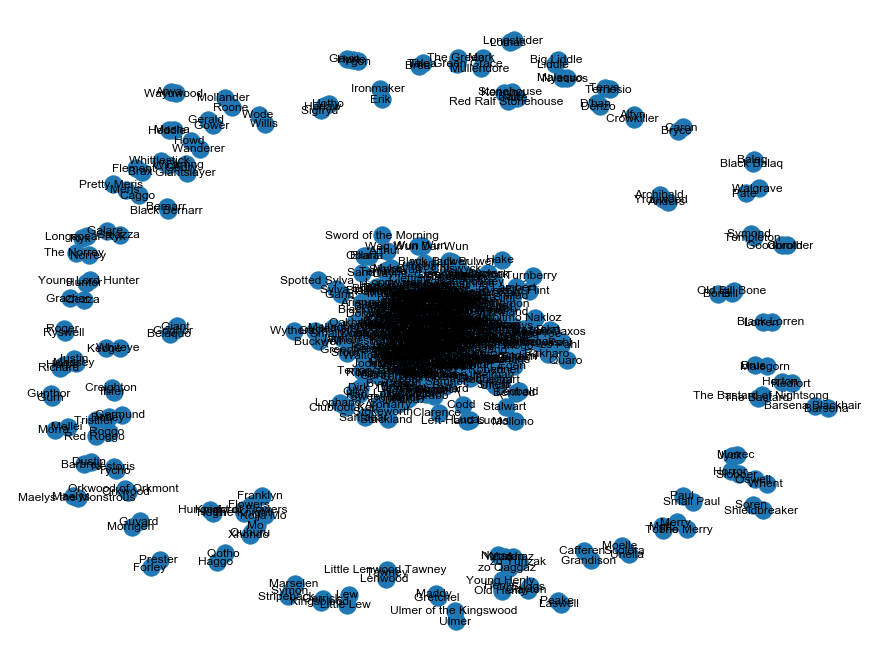

In [118]:
#Draw a simple network using the interaction dataframe to get an idea of what it looks like
G = nx.from_pandas_edgelist(interaction_df,
                             source='source',
                             target='target')
nx.draw_spring(G, with_labels=True)
plt.savefig('many_components.png')

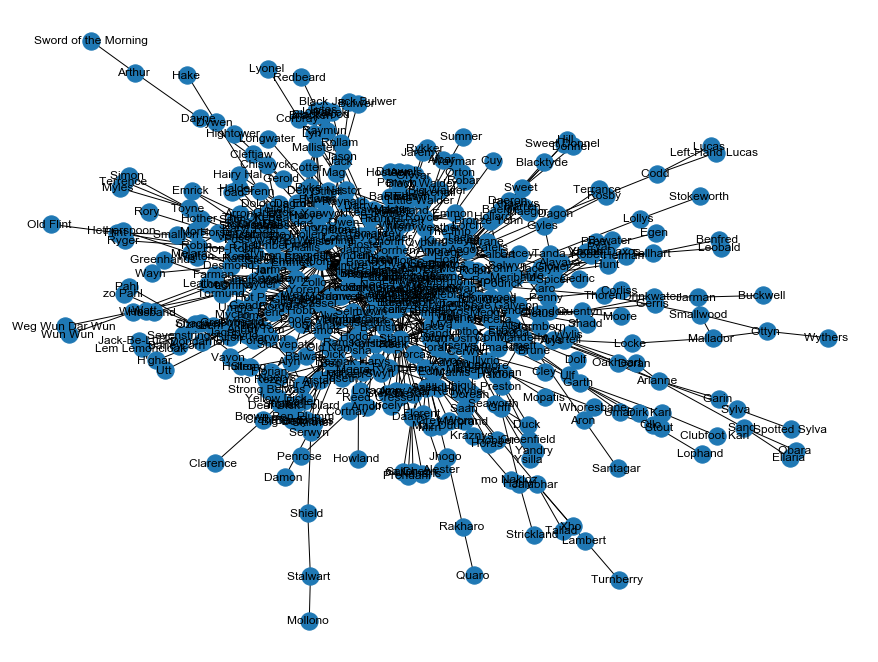

In [119]:
#Extraxt the maximal connected component of the graph, draw it
Gc = max(nx.connected_component_subgraphs(G), key=len)
nx.draw_spring(Gc, with_labels=True)
plt.savefig('largest_connected_component.png')

In [120]:
len(list(G))

708

In [121]:
G.number_of_edges()

1361

In [122]:
nx.average_shortest_path_length(Gc, weight = 'value')

4.049473112438892

In [68]:
cliques = list(nx.enumerate_all_cliques(G))

In [69]:
len(cliques)

5670

In [70]:
nx.radius(Gc)

5

In [71]:
nx.diameter(Gc)

10

In [72]:
nx.center(Gc)

['Jon ']

In [73]:
nx.number_connected_components(G)

80

In [74]:
nx.average_clustering(G, weight="value")

0.2930665532261632